In [1]:
import os.path as osp
import os
import matplotlib.pylab as plt
from tf_lab.icml.ae_farm_helper import relevant_class

In [2]:
%matplotlib inline

In [3]:
top_in_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/icml/synthetic_point_clouds/'

ae_loss = 'emd'
wgan_gp_experiments = True

if wgan_gp_experiments:
    prefix = 'nb_wgan_gp_ae_'    
else:
    prefix = 'nb_gan_ae_'
    
experiments_names = [name for name in os.listdir(top_in_dir) if (prefix in name) and (ae_loss in name)]
experiments_dir = [osp.join(top_in_dir, name) for name in experiments_names]

stats_holder = relevant_class(ae_loss)
print experiments_names

['nb_wgan_gp_ae_10_emd_chair_2048_max_min_epoch', 'nb_wgan_gp_ae_17_emd_chair_2048_best_epoch', 'nb_wgan_gp_ae_14_emd_chair_2048_best_epoch', 'nb_wgan_gp_ae_11_emd_chair_2048_max_min_epoch', 'nb_wgan_gp_ae_11_emd_chair_2048_best_epoch', 'nb_wgan_gp_ae_12_emd_chair_2048_best_epoch', 'nb_wgan_gp_ae_18_emd_chair_2048_best_epoch', 'nb_wgan_gp_ae_12_emd_chair_2048_max_min_epoch', 'nb_wgan_gp_ae_13_emd_chair_2048_max_min_epoch', 'nb_wgan_gp_ae_16_emd_chair_2048_best_epoch', 'nb_wgan_gp_ae_15_emd_chair_2048_best_epoch', 'nb_wgan_gp_ae_10_emd_chair_2048_best_epoch', 'nb_wgan_gp_ae_14_emd_chair_2048_max_min_epoch', 'nb_wgan_gp_ae_13_emd_chair_2048_best_epoch']


In [4]:
ae_name_to_id = lambda ae_name: int(ae_name[len(prefix):len(prefix)+2])
# epochs_used = [1, 3, 10, 30, 100, 300, 400, 500]
epochs_used = [1, 3, 10, 30, 100, 300, 400, 500, 1000, 1500]

In [6]:
best_exp = dict()
min_max_exp = dict()

for ex_dir, ex_name in zip(experiments_dir, experiments_names):    
    ex_id = ae_name_to_id(ex_name)
    bneck = stats_holder.experiment_id_to_bneck[ex_id]
    jsd_file = osp.join(ex_dir, 'jsd_stats.txt')
    
    d = min_max_exp
    if 'best' in ex_name:
        d = best_exp
    else:
        continue
        
    d[bneck] = []
        
    with open(jsd_file, 'r') as fin:                
        fin.readline () # first line is comment.
        for line in fin:
            meas = float(line.rstrip().split(' ')[2])
            d[bneck].append(meas)

In [7]:
d = best_exp
keys = sorted(d.keys())
for bneck in keys:
    print bneck, min(best_exp[bneck])

4 0.006283
8 0.006528
16 0.003705
32 0.003348
64 0.003812
128 0.003781
256 0.003831
512 0.003562
1024 0.003496


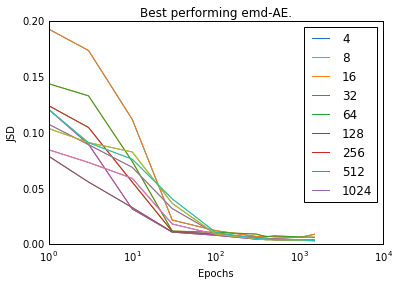

In [9]:
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

keys = sorted(best_exp.keys())
c = 0
for bneck in keys:
    plt.semilogx(epochs_used, best_exp[bneck], new_colors[c])
    c += 1
    plt.plot(epochs_used, best_exp[bneck], new_colors[c])
    
plt.legend(keys)
plt.title('Best performing %s-AE.' % (ae_loss,))
plt.ylabel('JSD')
plt.xlabel('Epochs')
plt.tick_params(axis='x', which='both', bottom='off', top='off')
plt.tick_params(axis='y', which='both', left='off', right='off')

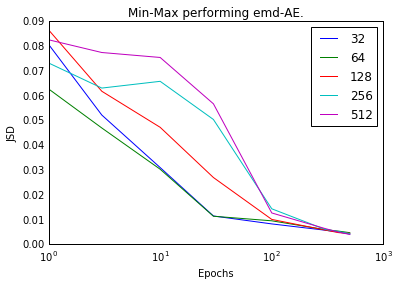

In [7]:
keys = sorted(min_max_exp.keys())
for bneck in keys:
    plt.semilogx(epochs_used, min_max_exp[bneck])
    
plt.legend(keys)
plt.title('Min-Max performing %s-AE.' % (ae_loss,))
plt.ylabel('JSD')
plt.xlabel('Epochs')
plt.tick_params(axis='x', which='both', bottom='off', top='off')
plt.tick_params(axis='y', which='both', left='off', right='off')